In [75]:
library(dismo)
library(readr)
miscanthus <- read_csv("C:/Users/rosar/miscanthus distribution.csv")#import the data from the file downloaded from https://www.gbif.org/


Parsed with column specification:
cols(
  .default = col_character(),
  gbifID = col_double(),
  individualCount = col_double(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  coordinateUncertaintyInMeters = col_double(),
  coordinatePrecision = col_logical(),
  elevation = col_double(),
  elevationAccuracy = col_double(),
  depth = col_logical(),
  depthAccuracy = col_logical(),
  eventDate = col_datetime(format = ""),
  day = col_double(),
  month = col_double(),
  year = col_double(),
  taxonKey = col_double(),
  speciesKey = col_double(),
  dateIdentified = col_datetime(format = ""),
  lastInterpreted = col_datetime(format = "")
)
See spec(...) for full column specifications.
Warning message:
"3 parsing failures.
 row                 col           expected  actual                                         file
2482 coordinatePrecision 1/0/T/F/TRUE/FALSE 0.01    'C:/Users/rosar/miscanthus distribution.csv'
2489 coordinatePrecision 1/0/T/F/TRUE/FALSE 0.0018  'C:

In [76]:
head(miscanthus)

gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
2447991246,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/35095004,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-30 18:28:30,CC_BY_NC_4_0,jzeiger05,jzeiger05,NA,NA,2019-11-08 01:24:32,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447970135,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/35009887,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-28 15:18:30,CC_BY_NC_4_0,jzeiger05,jzeiger05,NA,NA,2019-11-08 01:24:19,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447945342,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/34926992,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-27 14:42:49,CC_BY_NC_4_0,sarahs0922,sarahs0922,NA,NA,2019-11-08 01:23:55,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447928237,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/34856383,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-25 02:05:59,CC_BY_NC_4_0,cschorn,cschorn,NA,NA,2019-11-08 01:23:37,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447845501,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/34302618,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sinensis,...,NA,2019-10-13 14:21:15,CC_BY_NC_4_0,gutschow,gutschow,NA,NA,2019-11-08 01:22:42,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED
2447818664,7f5e4129-0717-428e-876a-464fbd5d9a47,Natuurpunt:Waarnemingen:180269910,Plantae,Tracheophyta,Liliopsida,Poales,Poaceae,Miscanthus,Miscanthus sacchariflorus,...,NA,NA,CC_BY_NC_4_0,Natuurpunt Studie,NA,NA,NA,2019-11-07 13:42:26,NA,NA


Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


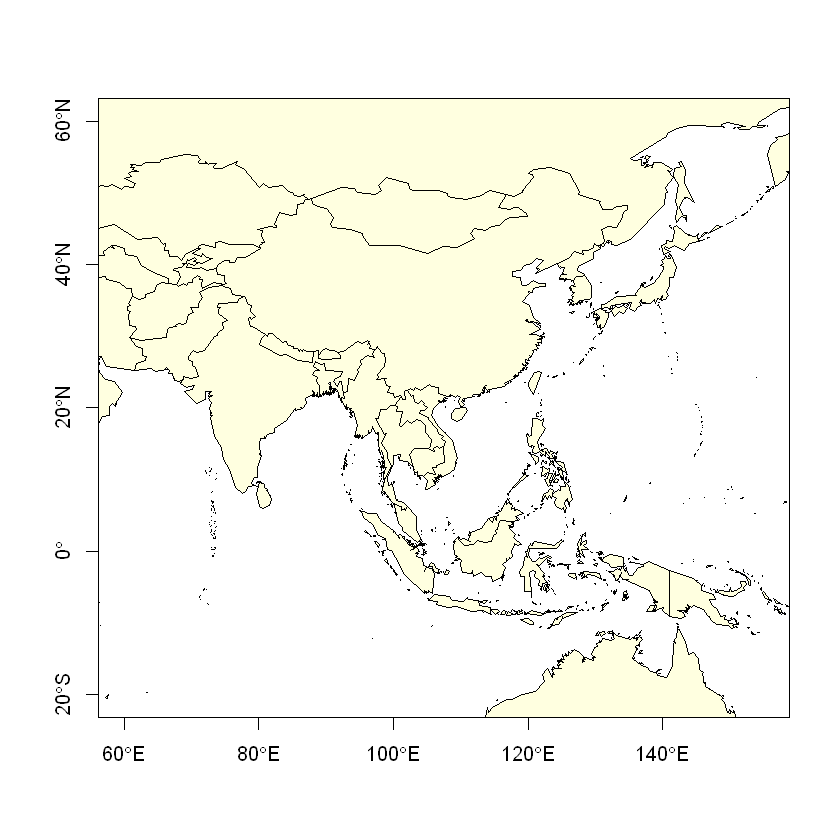

In [8]:
library(maptools)
data(wrld_simpl)
plot(wrld_simpl, xlim=c(60,155), ylim=c(-20,60), axes=TRUE, col="light yellow")
# restore the box around the map
box()

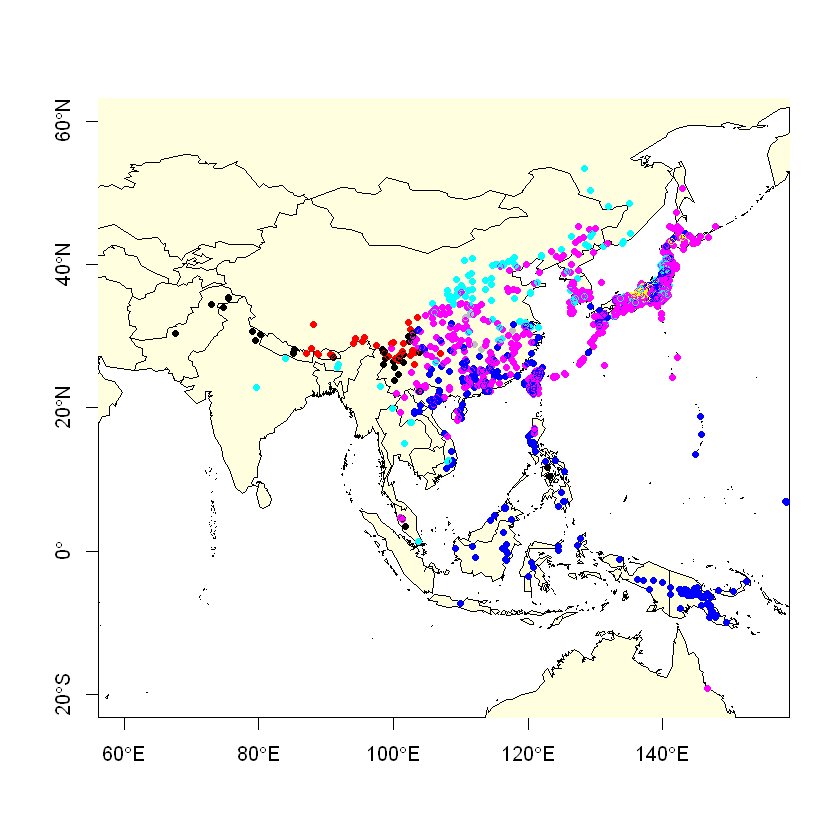

In [12]:
# add the points
plot(wrld_simpl, xlim=c(60,155), ylim=c(-20,60), axes=TRUE, col="light yellow")
points(miscanthus$decimalLongitude, miscanthus$decimalLatitude, col=as.factor(miscanthus$species), pch=20, cex=0.75)
# plot points again to add a border, for better visibility 
points(miscanthus$decimalLongitude, miscanthus$decimalLatitude, col=as.factor(miscanthus$species), cex=0.75)


In [34]:
library(dplyr)
miscanthus_dens<-miscanthus%>%
  count(species, decimalLatitude, decimalLongitude)
head(miscanthus_dens)

species,decimalLatitude,decimalLongitude,n
Miscanthus depauperatus,10.41100,123.1320,1
Miscanthus depauperatus,10.41159,123.1330,1
Miscanthus depauperatus,11.74194,122.8786,1
Miscanthus ecklonii,-34.12500,24.8750,1
Miscanthus ecklonii,-33.87500,18.3750,1
Miscanthus ecklonii,-33.87500,18.8750,1


Warning message:
"Removed 2241 rows containing non-finite values (stat_density2d)."

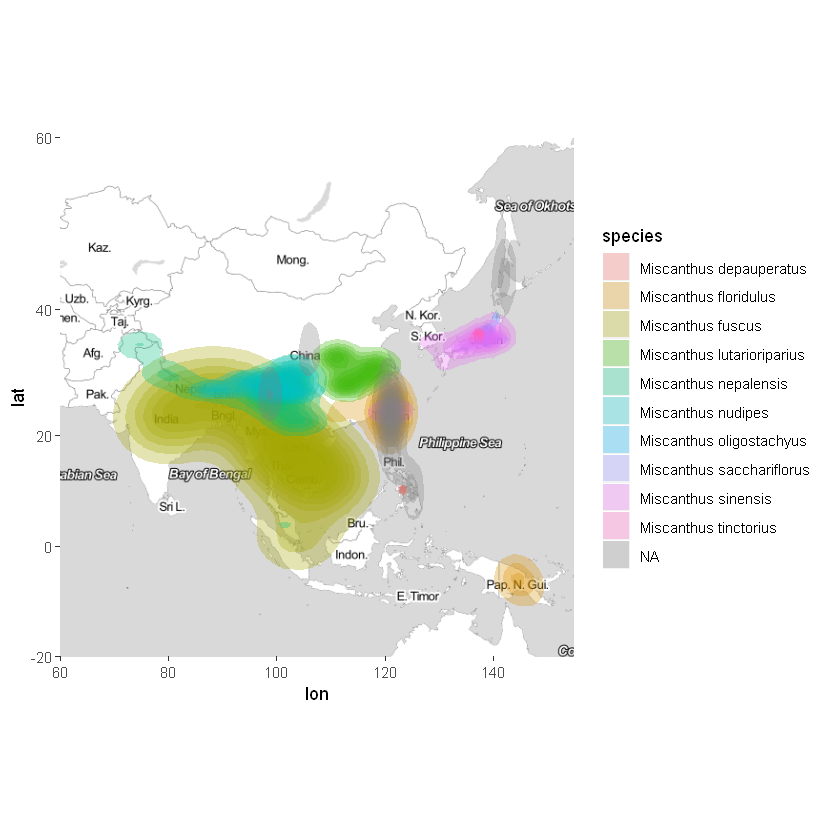

In [73]:
library("ggmap")
map <- c(left = 60, bottom = -20, right = 155, top = 60)
map1<-get_stamenmap(map, zoom = 3, maptype = "toner-lite")
ggmap(map1)+
    #geom_point(data = miscanthus_dens, 
               #mapping = aes(x = decimalLongitude, 
                             #y = decimalLatitude))+
    stat_density_2d(data = miscanthus_dens,aes(x = decimalLongitude,
                                               y = decimalLatitude, 
                                               fill = species), 
                    geom = "polygon", 
                    alpha = .3, 
                    color = NA)

In [85]:
install.packages("sf", dependencies = TRUE)
install.packages("rnaturalearthdata", dependencies = TRUE)
library(sf)
library(rnaturalearthdata)
# Create data frame of only longitude and latitude values
coords <- select(miscanthus_dens, decimalLongitude, decimalLatitude)

# Create SpatialPoints object with coords and CRS
points_sf <- st_as_sf(miscanthus_dens, coords = c("decimalLongitude", "decimalLatitude"), crs = 4326)

coast_sf <- ne_coastline(scale = "medium", returnclass = "sf")
countries_sf <- ne_countries(scale = "medium", returnclass = "sf")



Installing package into 'D:/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'D:/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


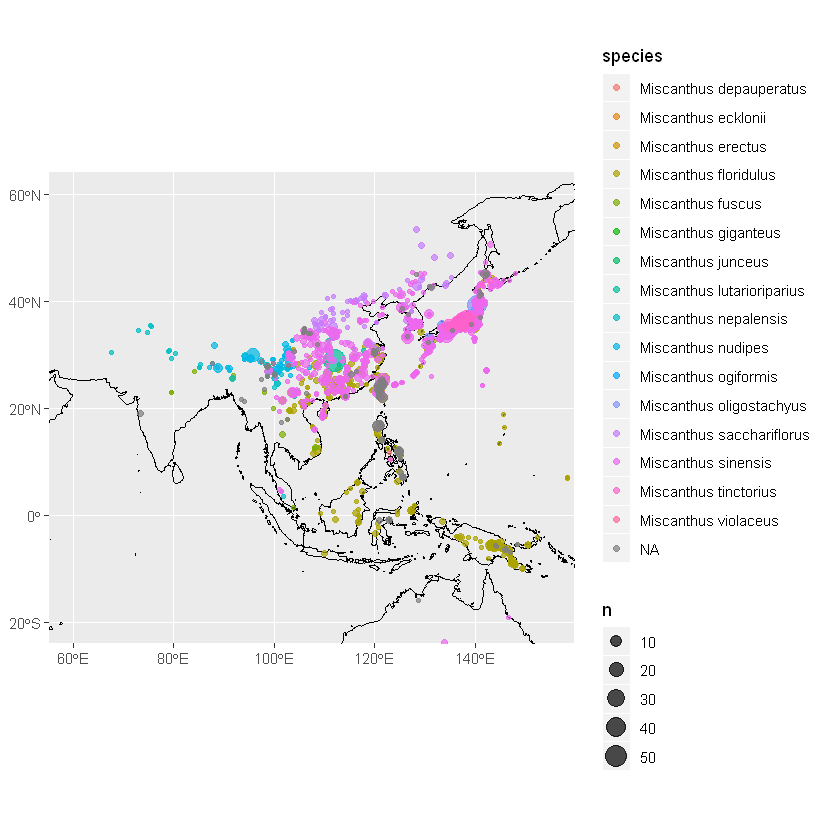

In [87]:
ggplot()+
  geom_sf(data = coast_sf) + 
  geom_sf(data = points_sf,
          aes(color = species, size = n),
          alpha = 0.7,
          show.legend = "point") +
  coord_sf(xlim=c(60,155), ylim=c(-20,60))

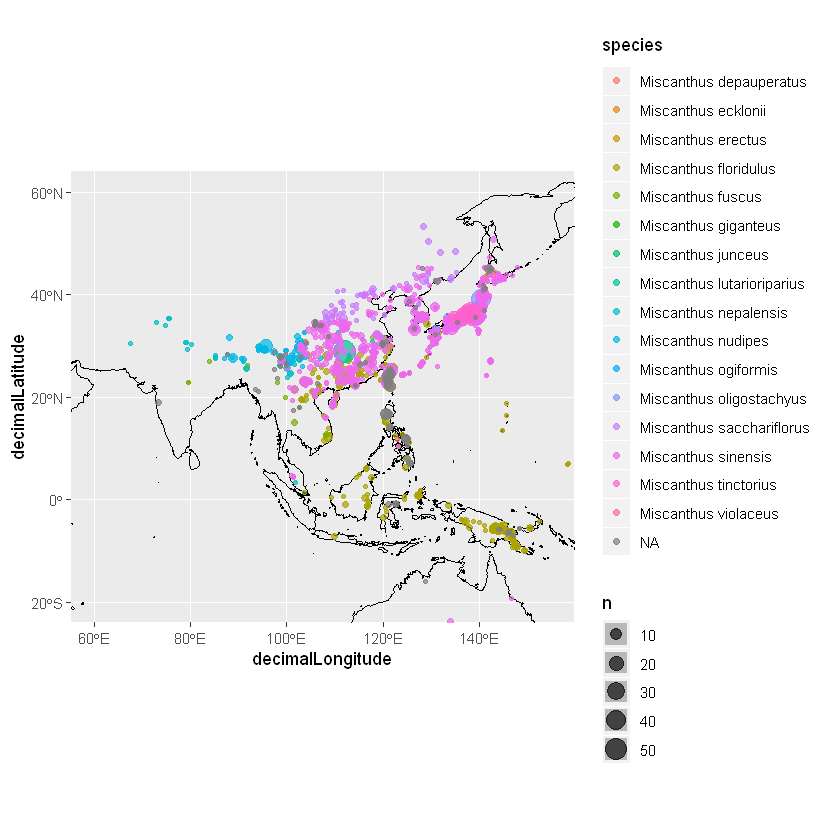

In [89]:
ggplot()+
    geom_sf(data = coast_sf) +
    geom_sf(data = points_sf,
          aes(color = species, size = n),
          alpha = 0.7,
          show.legend = "point")+
    stat_density_2d(data = miscanthus_dens,aes(x = decimalLongitude,
                                               y = decimalLatitude, 
                                               fill = species), 
                    geom = "polygon", 
                    alpha = .3, 
                    color = NA)+
    coord_sf(xlim=c(60,155), ylim=c(-20,60))